# **CHAPTER 2 자연어와 단어의 분산 표현**


# **2.1 자연어 처리란?**
* NLP(Natural Language Processing): 자연어를 처리하는 분야

> **사람의 말을 컴퓨터가 이해하도록** 만들어서, 컴퓨터가 우리에게 도움이 되는 일을 수행하게 한다.

* 자연어는 부드럽다. 즉, 같은 의미의 문장도 여러 형태로 표현할 수 있고, 문장 뜻이 애매할 수 잇고, 새로운 말이나 새로운 의미가 생기기도 한다.


## 2.1.1 단어의 의미

단어는 의미의 최소단위다.

-> 자연어를 컴퓨터에게 이해시키는 데는 '단어의 의미'를 이해시키는 게 중요하다.

**단어의 의미를 파악하는 표현 방법**
* 시소러스 활용한 기법->유의어 사전
* 통계 기반 기법
* 추론 기반 기법(word2vec)->신경망 활용

# 2.2 시소러스

* 단어의 의미를 인력을 동원해 **시소러스** 형태의 사전으로 정의하려는 시도
* **유의어 사전**으로, '뜻이 같은 단어(동의어)'나 '뜻이 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있다.
* 단어 사이의 '상위와 하위' 혹은 '전체와 부분' 등 **세세한 관계까지 정의**해둔 경우

> **car   =   auto   automobile   machine   motorcar**



> 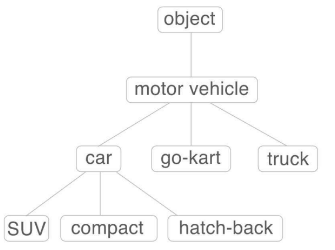

* 단어 네트워크 
1. 모든 단어에 대한 유의어 집합 만들기
2. 단어들의 관계를 그래프로 표현하여 단어사이의 연결 정의하기

=> '단어 네트워크'를 이용하여 컴퓨터에게 단어 사이의 관계를 가르치고, 단어의 의미를 이해시킬 수 있다.

## 2.2.1 WordNet
* 자연어 처리에서 가장 유명한 시소러스
* **사람이 수작업으로 레이블링 하는 방식**
* **수많은 단어에 대한 동의어와 계층 구조 등의 관계가 정의돼있어 이를 이용해 단어의 의미를 컴퓨터에 전달할 수 있다.**
* WordNet을 사용하여 유의어를 얻거나 '단어 네트워크'를 이용하거나 단어 사이의 유사도를 구할 수 있다. 

## 2.2.1 시소러스의 문제점

**1. 시대 변화에 대응하기 어렵다.**  (사람이 수작업으로 끊임없이 갱신하기 어려움)

**2. 사람을 쓰는 비용이 크다**

**3. 단어의 미묘한 차이를 표현할 수 없다.** (의미는 같지만 용법이 다른 경우 등)


### 👊 **통계 기반 기법**과 신경망을 사용한 **추론 기반 기법**으로 문제 해결!

#**2.3 통계 기반 기법**

* 말뭉치(corpus)
  - 대량의 텍스트 데이터
  - 문장들은 사람이 쓴 글이므로 자연어에 대한 사람의 '지식'이 충분히 담겨 있음.



> **목표: 사람의 지식으로 가득한 말뭉치에서 자동으로, 그리고 효율적으로 그 핵심을 추출한다.**


##2.3.1 파이썬으로 말뭉치 전처리하기

In [ ]:
text = 'You say goodbye and i say hello.'

In [ ]:
# 대문자, 소문자 모두 똑같이 취급하기 위해
text = text.lower()
text = text.replace('.',' .')
text

'you say goodbye and i say hello .'

In [ ]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
'''
단어를 텍스트 그대로 조작하기에 불편하여 ID를 부여하고, ID의 리스트로 이용할 수 있도록 함
딕셔너리로 단어ID와 단어를 짝지어주는 대응표 작성
'''
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [ ]:
# 단어목록을 단어ID목록으로 변경 ->다시 넘파이 배열로 변환
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

말뭉치 전처리 함수

In [ ]:
def preprocess(text):
  text = text.lower()
  text = text.replace('.',' .')
  words = text.split(' ')
  
  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word
  
  corpus = np.array([word_to_id[w] for w in words])

  return corpus, word_to_id, id_to_word

In [ ]:
text = 'You say goodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [ ]:
'''
corpus: 단어ID목록
word_to_id: 단어에서 단어ID로의 딕셔너리
id_to_word:단어ID에서 단어로 딕셔너리
'''
corpus, word_to_id, id_to_word

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

## 2.3.2 단어의 분산 표현

분산 표현: '단어의 의미'를 정확하게 파악할 수 있는 벡터 표현(RGB처럼)


## 2.3.3 분포 가설


> 분포가설: 단어의 의미는 주변 단어에 의해 형성된다!

단어 자체에는 의미가 없고, 그 단어가 사용된 '**맥락**'이 의미를 형성한다.
* 맥락: 특정 단어를 중심에 둔 그 주변 단어
* 윈도우 크기(맥락의 크기): 주변 단어를 몇 개나 포함할지를 나타냄. 
  - 윈도우 크기가 1이면 좌우 한 단어씩, 2면 좌우 두 단어씩이 맥락에 포함된다.
* 상황에 따라 왼쪽 또는 오른쪽 단어만을 사용하기도 하고, 문장의 시작과 끝을 고려하기도 함

## 2.3.4 동시발생 행렬 => 단어를 벡터로 나타냄

통계기반기법: 어떤 단어에 주목했을 때, 그 주변에 어떤 단어가 몇 번이나 등장하는지를 세어 집계하는 방법

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Deep_Learning_from_scratch2/nlp-study-fromscratch/')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(f'corpus: {corpus}')
print(f'word_to_id: {word_to_id}')
print(f'id_to_word: {id_to_word}')


corpus: [0 1 2 3 4 1 5 6]
word_to_id: {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
id_to_word: {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


**Co-occurrence Matrix**
표의 각 행은 해당 단어를 표현한 벡터가 됨.
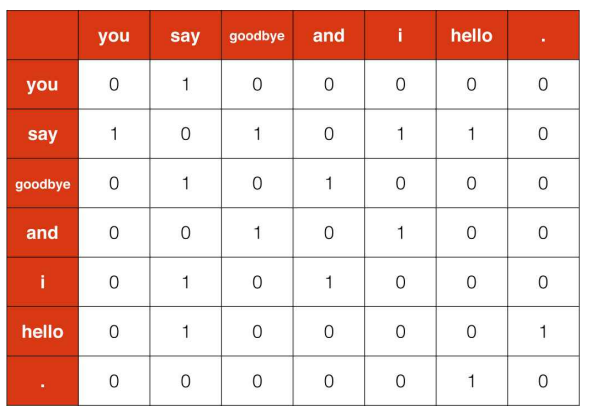

In [ ]:
C = np.array([[0, 1, 0, 0, 0, 0, 0], 
              [1, 0, 1, 0, 1, 1, 0], 
              [0, 1, 0, 1, 0, 0, 0], 
              [0, 0, 1, 0, 1, 0, 0], 
              [0, 1, 0, 1, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 1], 
              [0, 0, 0, 0, 0, 1, 0]], dtype=np.int32)

In [ ]:
print(C[0])
print(C[4])
print(C[word_to_id['goodbye']])

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


corpus로부터 Co-occurrence Matrix를 만들어주는 함수 구현

In [ ]:
# 인수는 차례로 단어ID리스트, 어휘 수, 윈도우 크기
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    # co_matrix를 0으로 채워진 2차원 배열로 초기화
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i  # left window_size
            right_idx = idx + i  # right window_size

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
                
    return co_matrix

In [ ]:
window_size = 1
vocab_size = len(id_to_word)

C = create_co_matrix(corpus, vocab_size, window_size=1)
C


array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

## 2.3.5 벡터 간 유사도
* 단어 벡터의 유사도를 나타낼 때는 **코사인** 유사도(cosine similarity)를 자주 이용한다.
* 두 벡터에 대한 코사인 유사도는 다음과 같이 나타낸다.
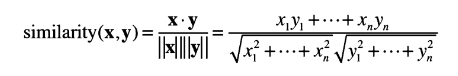
* 식의 핵심은 벡터를 정규화(norm, 분자)하고 내적(분자)을 구하는 것이다.
* 직관적으로 말하면, 코사인 유사도는 '두 벡터가 가리키는 방향이 얼마나 비슷한가'이다.
* 두 벡터의 방향이 완전히 같다면 1, 완전히 반대라면 -1이 된다.

In [ ]:
# util.py에 추가
def cos_similarity(x,y):
  # 인수로 제로 벡터가 들어오면 divide by zero오류 발생하므로 작은 값을 더해줌
    nx = x / np.sqrt(np.sum(x**2) + eps)  # x의 정규화
    ny = y / np.sqrt(np.sum(y**2) + eps)  # y의 정규화
    return np.dot(nx, ny) #분자 내적

you와 i의 유사도를 구하는 코드

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Deep_Learning_from_scratch2/nlp-study-fromscratch/')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  # "you"의 단어 벡터
c1 = C[word_to_id['i']]  # 'i'의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067758832467


## 2.3.6 유사 단어의 랭킹 표시
어떤 단어가 검색어로 주어지면, 그 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수

1. 검색어의 단어 벡터를 꺼낸다.
2. 검색어의 단어 벡터와 다른 모든 단어 벡터와의 코사인 유사도를 각각 구한다.
3. 계산한 코사인 유사도 결과를 기준으로 값이 높은 순서대로 출력한다.

In [ ]:
# query:검색어, word_matrix: 단어 벡터들을 한데 모은 행렬
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1. 검색어를 꺼낸다.
    if query not in word_to_id:
        print(f'{query}(을)를 찾을 수 없습니다.')
        return 
    
    print(f'\n[query] {query}')
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2. 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3. 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(f' {id_to_word[i]}: {similarity[i]}')
        
        count +=1
        if count >= top:
            return

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Deep_Learning_from_scratch2/nlp-study-fromscratch/')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


# **2.4 통계 기반 기법 개선하기**

## 2.4.1 상호정보량
동시발생 행렬의 원소는 두 단어가 동시에 발생한 횟수를 나타내는데 이건 그리 좋지 않은 지표이다. the는 당연히 고빈도 단어라서 강한 관련성을 갖는다고 평가될 것이다. 이 문제 해결을 위해 **점별 상호량(Pointwise Mutual Information)(PMI)**이라는 척도를 사용한다.

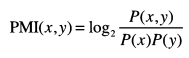
* P(x)는 x가 일어날 확률, P(y)는 y가 일어날 확률, P(x,y)는 x와 y가 동시에 일어날 확률
* **PMI 값이 높을수록 관련성이 높다.**



---



동시발생 행렬을 이용해 다시 써보자. 말뭉치에 포함된 단어 수를 N이라 하면,


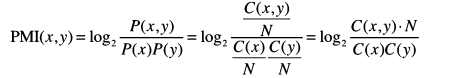

-> 'the'를 평가할 때 단독으로 출현하는 횟수가 고려되므로 'the'는 PMI점수가 낮아졌다.

그러나, 두 단어의 동시발생 횟수가 0이면 -inf가 된다는 문제점이 발생하므로 실제로 구현할 때는 **양의 상호정보량(PPMI)**를 사용한다.

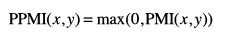

In [ ]:
'''
C: 동시발생 행렬 verbose: 진행 상황 출력 여부
'''
def ppmi(C, verbose=False, eps = 1e-8):
    '''PPMI(점별 상호정보량) 생성

    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return:
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100 + 1) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

동시발생행렬은 ppmi로 변환

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Deep_Learning_from_scratch2/nlp-study-fromscratch/')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('Co-occurrence Matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

Co-occurrence Matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


**PPMI행렬의 문제**
1. corpus의 어휘 수가 증가함에 따라 각 단어 벡터의 차원 수도 증가한다.
2. 행렬의 원소 대부분이 0인데 이건 중요도가 낮다.
3. 따라서, 노이즈에 약하고 견고하지 못하다.
=> **벡터의 차원 감소**로 극복하자

##2.4.2 차원 감소
'중요한 정보'는 최대한 유지하면서 벡터의 차원을 줄인다.

* 희소벡터(원소 대부분이 0) -> 밀집벡터(원소 대부분이 0이 아닌 값)     


---


#### **특잇값분해(SVD)**
임의의 행렬을 세 행렬의 곱으로 분해한다.

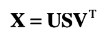

**U, V**는 직교 행렬이고, 그 열벡터는 서로 직교한다. **S**는 대각행렬이다.
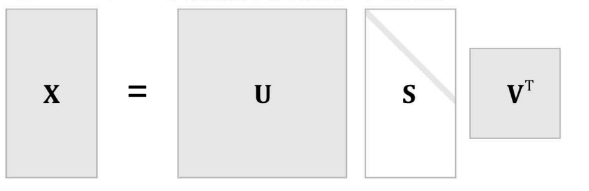

**U**는 직교행렬이다. 이는 어떠한 공간의 축(기저)을 형성한다. 즉, 단어공간이라 볼 수 있다.  
**S**의 대각성분에는 특잇값이 큰 순서로 나열되어 있다. 해당 축의 중요도라고 간주할 수 있다.

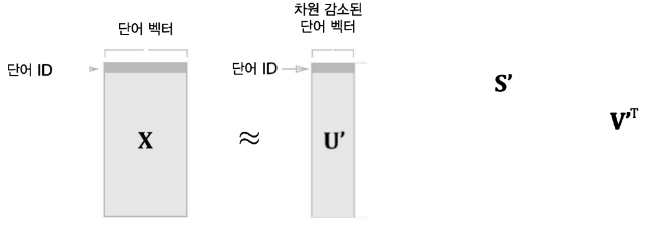
이렇게 중요도가 낮은 원소(즉, 특이값이 작은 원소)를 깎아내는 방법을 생각할 수 있다.
**S**에서 특잇값이 작다면 중요도가 낮다는 뜻이므로, **U**에서 여분의 열벡터를 깎아내어 원래의 행렬을 근사할 수 있다. 

=> 단어의 PPMI행렬에 적용해보면,   

**X**의 각 행에는 해당단어 ID의 단어 벡터가 저장되어 있으며, 그 단어 벡터가 **U'**라는 차원 감소된 벡터로 표현되는 것이다.

##2.4.3 SVD에 의한 차원 감소

동시발생 행렬을 만들어 PPMI행렬로 변환한 다음, SVD를 적용해보자.

In [ ]:
# count_method_small.py
%matplotlib inline
import sys
sys.path.append('/content/drive/MyDrive/Deep_Learning_from_scratch2/nlp-study-fromscratch/')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [ ]:
print(C[0])  # 동시발생 행렬
print(W[0])  # PPMI 행렬
print(U[0])  # SVD

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -1.205e-01 -4.163e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


희소벡터인 W가 밀집벡터U로 바뀌었다. 밀집벡터 차원 감소시키려면 만약 2차원 벡터로 줄이려면 단순히 처음의 두 원소를 꺼내면 된다.

In [ ]:
print(U[0,:2])

[ 3.409e-01 -1.110e-16]


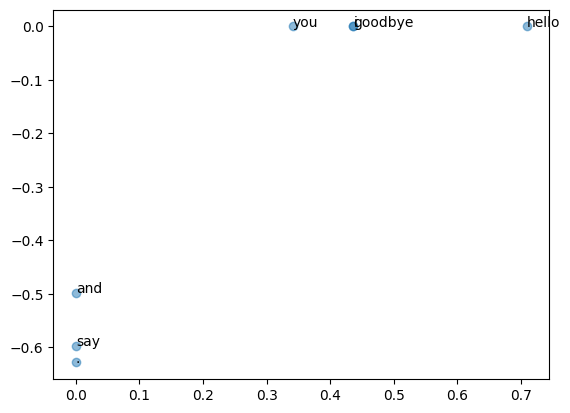

In [ ]:
# 각 단어를 2차원 벡터로 표현한 후 그래프로 그려보자
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

##2.4.4 PTB 데이터셋
**펜 트리뱅크(PTB)** 말뭉치는 주어진 기법의 품질을 측정하는 벤치마크로 자주 이용된다.

In [19]:
!pwd

/content


In [22]:
%cd /content/drive/MyDrive/Deep_Learning_from_scratch2/nlp-study-fromscratch

/content/drive/MyDrive/Deep_Learning_from_scratch2/nlp-study-fromscratch


In [23]:
%cd /content/drive/MyDrive/Deep_Learning_from_scratch2/nlp-study-fromscratch

ch02/  common/  dataset/  README.md  Untitled0.ipynb


In [24]:
import sys
# sys.path.append('/content/drive/MyDrive/Deep_Learning_from_scratch2/nlp-study-fromscratch/')
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

Done
말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


## 2.4.5 PTB 데이터셋 평가

In [25]:
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('Create Co-occurrence Matrix...')
C = create_co_matrix(corpus, vocab_size, window_size)

Create Co-occurrence Matrix...


In [26]:
print('PPMI 계산...')
W = ppmi(C, verbose=True)

PPMI 계산...
1.00 완료
2.00 완료
3.00 완료
4.00 완료
5.00 완료
6.00 완료
7.00 완료
8.00 완료
9.00 완료
10.00 완료
11.00 완료
12.00 완료
13.00 완료
14.00 완료
15.00 완료
16.00 완료
17.00 완료
18.00 완료
19.00 완료
20.00 완료
21.00 완료
22.00 완료
23.00 완료
24.00 완료
25.00 완료
26.00 완료
27.00 완료
28.00 완료
29.00 완료
30.00 완료
31.00 완료
32.00 완료
33.00 완료
34.00 완료
35.00 완료
36.00 완료
37.00 완료
38.00 완료
39.00 완료
40.00 완료
41.00 완료
42.00 완료
43.00 완료
44.00 완료
45.00 완료
46.00 완료
47.00 완료
48.00 완료
49.00 완료
50.00 완료
51.00 완료
52.00 완료
53.00 완료
54.00 완료
55.00 완료
56.00 완료
57.00 완료
58.00 완료
59.00 완료
60.00 완료
61.00 완료
62.00 완료
63.00 완료
64.00 완료
65.00 완료
66.00 완료
67.00 완료
68.00 완료
69.00 완료
70.00 완료
71.00 완료
72.00 완료
73.00 완료
74.00 완료
75.00 완료
76.00 완료
77.00 완료
78.00 완료
79.00 완료
80.00 완료
81.00 완료
82.00 완료
83.00 완료
84.00 완료
85.00 완료
86.00 완료
87.00 완료
88.00 완료
89.00 완료
90.00 완료
91.00 완료
92.00 완료
93.00 완료
94.00 완료
95.00 완료
96.00 완료
97.00 완료
98.00 완료
99.00 완료
100.00 완료


In [27]:
try:
    # truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except:
    # SVD
    U, S, V = np.linalg.svd(W)

    
word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 i: 0.6693589687347412
 do: 0.5996785759925842
 anybody: 0.582507848739624
 we: 0.5792205929756165
 'll: 0.5670298337936401

[query] year
 month: 0.6916713118553162
 quarter: 0.6522691249847412
 earlier: 0.6310529112815857
 last: 0.6204756498336792
 next: 0.5966063141822815

[query] car
 auto: 0.6490854024887085
 cars: 0.6015466451644897
 luxury: 0.5561596751213074
 corsica: 0.5319173336029053
 truck: 0.5089586973190308

[query] toyota
 motors: 0.6644338369369507
 motor: 0.6605661511421204
 nissan: 0.6178393363952637
 lexus: 0.6022477149963379
 mazda: 0.5833355188369751


단어의 분산 표현 정리
1. corpus로 맥락에 속한 단어의 등장 횟수를 센다
2. PPMI로 행렬로 변환한다.
3. SVD를 이용해 차원을 감소시킨다.
-> 각 단어는 고정 길이의 밀집벡터로 표현되었다. 

## **2.5 정리**
컴퓨터에게 '단어의 의미' 이해시키기

1. 시소러스 기반 기법은 수작업이라 인적 자원이 많이 들고 새로운 단어에 대응하기 어렵다.
2. 현재는 corpus를 이용해 단어를 벡터화하는 방식이 주로 쓰인다.
3. 최근의 단어 벡터화 기법은 대부분 ' 단어의 의미는 주변 단어에 의해 형성된다'는 분포 가설에 기초한다.
4. 동시발생 행렬은 corpus 안의 각 단어에 대해서 그 단어의 주변 단어의 빈도를 집계한다.
5. 통계 기반 기법은 corpus로부터 단어의 동시발생 행렬을 만들고, PPMI행렬로 변환한 다음, SVD를 이용해 차원을 감소시켜 거대한 '희소벡터'를 작은 '밀집벡터'로 변환할 수 있다. (각 단어의 분산 표현)
6. 단어의 벡터 공간에서는 의미가 가까운 단어는 그 거리도 가까울 것으로 기대된다.